In [1]:
import copy
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\Dell-pc\\Desktop\\CV4'

In [3]:
os.chdir('Q4')

In [4]:
# p=os.listdir()
# images=[]
# for i in p:
#     img=cv2.imread(i)
#     images.append(img)

In [5]:
# #Pyimagesearch.com 
# stitcher = cv2.createStitcher()
# (status, stitched) = stitcher.stitch(images)

In [6]:
size_local=255

In [ ]:
!ls

In [14]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop top
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop top
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop top
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame

In [ ]:
# cv2.imwrite('After_panorama.png',(stitched/np.max(stitched)*size_local))
# cv2.imshow('Panoroma  ',stitched/np.max(stitched))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [42]:
img4.shape

(273, 357, 3)

In [66]:
# Reference: https://medium.com/pylessons/image-stitching-with-opencv-and-python-1ebd9e0a6d78
def panoroma(img4,img):
    img_ = copy.deepcopy(img4)
    img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
  
    #img = cv2.imread('original_image_right.jpg')
    #img = cv2.resize(img, (0,0), fx=1, fy=1)
    img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # plt.imshow(img1)
    sift = cv2.xfeatures2d.SIFT_create()
    # find key points
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    #cv2.imshow('original_image_left_keypoints',cv2.drawKeypoints(img_,kp1,None))
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    match = cv2.FlannBasedMatcher(index_params, search_params)
    # match = cv2.BFMatcher()
    matches = match.knnMatch(des1,des2,k=2)
    good = []
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            good.append(m)
    draw_params = dict(matchColor=(0,255,0),
                           singlePointColor=None,
                           flags=2)
    img3 = cv2.drawMatches(img_,kp1,img,kp2,good,None,**draw_params)
    # plt.imshow(img3)
    
    MIN_MATCH_COUNT = 1
    # print(len(good))
    if len(good) > MIN_MATCH_COUNT:
    #     print("hello")
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts, M)
        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
#         plt.imshow(img2)
        #cv2.imshow("original_image_overlapping.jpg", img2)
    else:
        print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))
    dst = cv2.warpPerspective(img_,M,(img.shape[1] + img_.shape[1], img.shape[0]))
#     dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
    dst[0:img.shape[0],0:img.shape[1]] = img
    # plt.imshow(dst)
    img4=trim(dst)
    return img4,img3,img2,dst


In [64]:


img_ = cv2.imread('1a.jpg',1)
img = cv2.imread('1b.jpg',1)
img1=cv2.imread('1c.jpg',1)
img4=panoroma(img,img_)
img5=panoroma(img1,img4)

In [67]:
#For readings 
img_ = cv2.imread('1a.jpg',1)
img = cv2.imread('1b.jpg',1)
img4,a1,a2,a3=panoroma(img,img_)


In [74]:
img1=cv2.imread('1c.jpg',1)
img4,a1,a2,a3=panoroma(img1,img4)

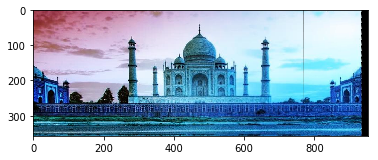

In [75]:
plt.imshow(img4)

In [76]:
cv2.imwrite('after1_stitching.png',(img4/np.max(img4)*size_local))
cv2.imwrite('after1_stitching1.png',(a1/np.max(a1)*size_local))
cv2.imwrite('after1_stitching2.png',(a2/np.max(a2)*size_local))
cv2.imwrite('after1_stitching3.png',(a3/np.max(a3)*size_local))

True